# Python Machine Learning Book

Unlock deeper insights into machoine learning with this vital guide to cutting edge predictive analytics
Forward by Dr. Randal S. Olson
Artificial intelligence and machine learning researcher, Univeristy of Pennsylvania

In [23]:
import numpy as np
class Perceptron(object):
    """Perceptron classifier
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
        
    Attributes
    
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
        
    """
    
    def __init__(self,eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self,X,y):
        """Fit training data
        
        Parameters
        ----------
        
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and n_features is the number of features
        y : array-like, shape =[n_samples], Target values
        
        Returns
        -------
        self : object
        
        """
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        """ Calculate net input"""
        return np.dot(X,self.w_[1:])+ self.w_[0]
    
    def predict(self,X):
        """ Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [33]:
np.zeros(4)

array([ 0.,  0.,  0.,  0.])

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
...   'machine-learning-databases/iris/iris.data', header=None)

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [30]:
# The column of 4 with 100 rows - This is the target variable
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [31]:
# This is the process to convert y into numeric value
y = np.where(y =='Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [20]:
# Independent/Predictive variables x1, x2
X = df.iloc[0:100, [0,2]].values

In [34]:
np.zeros(1+X.shape[1])

array([ 0.,  0.,  0.])

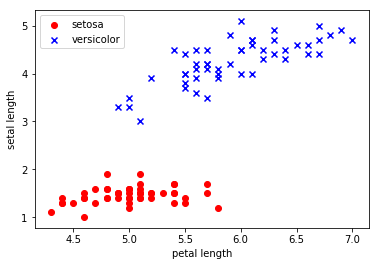

In [18]:
plt.scatter(X[:50,0],X[:50,1],
           color = 'red',marker = 'o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],
           color = 'blue',marker = 'x',label = 'versicolor')

plt.xlabel('petal length')
plt.ylabel('setal length')
plt.legend(loc = 'upper left')
plt.show()

In [32]:
ppn = Perceptron(eta = 0.1,n_iter =10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker = 'o')
plt.xlabel('Epoche')
plt.ylabel('Number of misclassifications')
plt.show()

ValueError: setting an array element with a sequence.